<a href="https://colab.research.google.com/github/ua-datalab/Workshops/blob/main/Machine_Learning_Basics_Scikit_learn_Unveiled/machine_learning_algorithms_for_beginners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Algorithms for Beginners Code Examples

Tutorial: https://towardsai.net/p/machine-learning/machine-learning-algorithms-for-beginners-with-python-code-examples-ml-19c6afd60daa


# Linear Regression Example

In [75]:
# Import required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


# Read the CSV file :
data = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv")

data.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [77]:
int((len(data))*0.8)

853

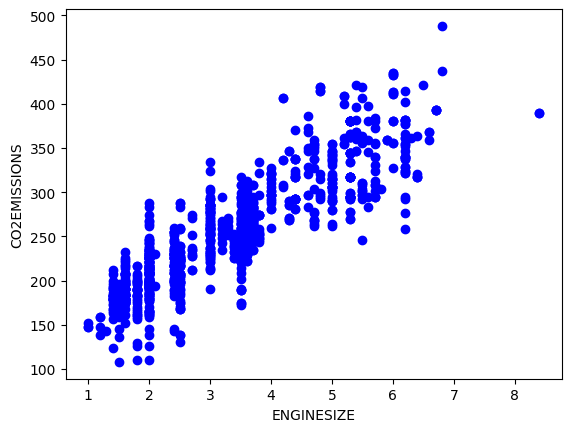

In [78]:
# Let's select some features to explore more :
data = data[["ENGINESIZE","CO2EMISSIONS"]]

# ENGINESIZE vs CO2EMISSIONS:
plt.scatter(data["ENGINESIZE"] , data["CO2EMISSIONS"] , color="blue")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()


In [79]:
# Generating training and testing data from our data:
# We are using 80% data for training.
train = data[:(int((len(data)*0.8)))] # The first 80% of data [0:852]
test = data[(int((len(data)*0.8))):]  # The rest after the first 80% of data [853:1066]

# Modeling:
# Using sklearn package to model data :
regr = linear_model.LinearRegression()     # Linear fit
train_x = np.array(train[["ENGINESIZE"]])  # Train data 1st. column
train_y = np.array(train[["CO2EMISSIONS"]]) # Train data 2nd. column
regr.fit(train_x,train_y) # Fit using training data. Returns coeffs linear fit

# The coefficients:
print ("coefficients : ",regr.coef_) #Slope
print ("Intercept : ",regr.intercept_) #Intercept


coefficients :  [[38.79512384]]
Intercept :  [127.16989951]


In [80]:
regr.coef_

array([[38.79512384]])

In [81]:
(int((len(data)*0.8)))
#((len(data)*0.81))

853

Text(0, 0.5, 'Emission')

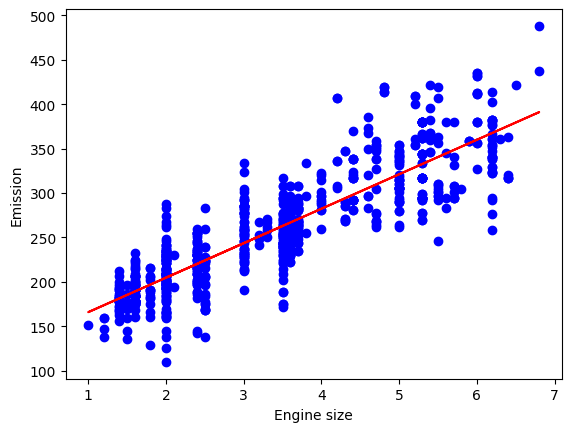

In [82]:
# Plotting the regression line:
plt.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"], color='blue')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")


In [83]:
# Regression
# Predicting values:
# Function for predicting future values :
def get_regression_predictions(input_features,intercept,slope):
 predicted_values = input_features*slope + intercept
 return predicted_values

# Predicting emission for future car:
my_engine_size = 3.5
estimatd_emission = get_regression_predictions(my_engine_size,regr.intercept_[0],regr.coef_[0][0])
print ("Estimated Emission :",estimatd_emission)


Estimated Emission : 262.9528329350173


In [84]:
# Evaluation of Regression
# Checking various accuracy:
from sklearn.metrics import r2_score
test_x = np.array(test[['ENGINESIZE']])
test_y = np.array(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Mean sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )


Mean absolute error: 20.60
Mean sum of squares (MSE): 746.45
R2-score: 0.71


### Least Squares Linear Regression

Suppose we have $(n+1)$ points $(x_0, y_0), (x_1,y_1), \ldots , (x_n, y_n)$ in a plane and we want to fit a curve  $y = a_0 + a_1 x$ which "best fits" to the set of data.

This is the [Linear Regression Method](https://en.wikipedia.org/wiki/Linear_regression), that minimizes the sum of squares errors $SSE$.

\begin{equation*}
SSE = \sum_i (y_i - (a_0 + a_1 x_i))^2
\end{equation*}

In matrix form, the linear regression can be written as

\begin{equation*}
X =
\begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_n \\
\end{bmatrix}, \vec{y} =
\begin{bmatrix}
 y_1 \\
 y_2 \\
\vdots \\
 y_n \\
\end{bmatrix}, \vec{a} =
\begin{bmatrix}
a_0 \\
a_1 \\
\end{bmatrix}
\end{equation*}

from which the $SSE$ can be rewritten as  
\begin{equation*}
SSE = || \vec{y} - X \vec{a} ||^2
\end{equation*}

The vectors $\vec{a}$ that minimize the previous equation, have a unique solution if and only if the columns of the $X$ matrix are linear independent. Then matrix $X^T X$ is symmetric and therefore diagonalizable. Multiplying the above equation by the left, we get

\begin{eqnarray*}
(\vec{y} - X \vec{a}) & = & 0 \\
X^T (\vec{y} - X \vec{a}) & = & 0 \\
X^T \vec{y} - (X^T X) \vec{a} & = & 0 \\
(X^T X) \vec{a} & = & X^T \vec{y}
\end{eqnarray*}

This last equation must be solved for the vector $\vec{a}$.


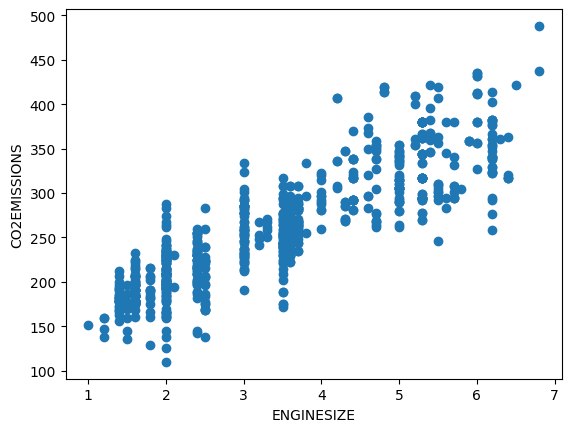

In [85]:
# For completeness we can apply the Ordinary Least Squares Method and
# Verify that we obtain the same results as with the LinearRegression()

# The Standard Least Squares Method

#x = data["ENGINESIZE"]
#y = data["CO2EMISSIONS"]

x = train_x
y = train_y

plt.scatter(x,y);
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()


In [86]:
# We create the X matrx, with 1's in the first column and the x_k data in the second.

N = len(x)
X = np.column_stack([np.ones(N),x])
print('Shape:', X.shape)


Shape: (853, 2)


In [87]:
# We use the
# We can use the scipy.linalg.solve() function to solve the equation X.T@X@a = X.T@y with respect to 'a'

import scipy.linalg as la

a = la.solve(X.T @ X, X.T @ y)

print(a)

# The coefficients:

print ("Intercept : ", a[0]) #Intercept
print ("coefficient : ", a[1]) #Slope


[[127.16989951]
 [ 38.79512384]]
Intercept :  [127.16989951]
coefficient :  [38.79512384]


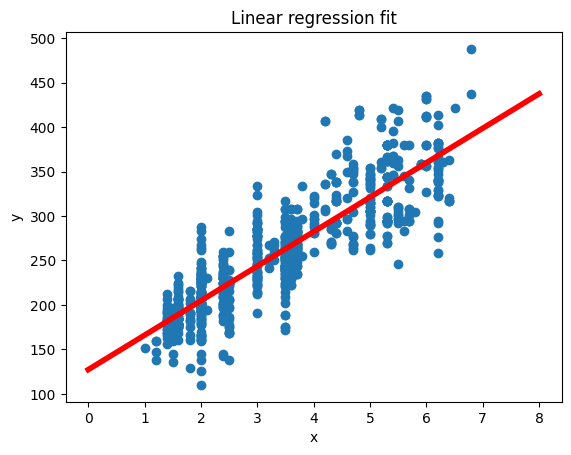

In [88]:
# We can plot the linear fit with these 2 coefficients of the regression y = a_0 + a_1 x

xs = np.linspace(0,8,25)
ys = a[0] + a[1]*xs

plt.plot(xs,ys,'r',linewidth=4)

plt.scatter(x,y);
plt.title('Linear regression fit')

plt.xlabel('x')
plt.ylabel('y')
plt.show()


# Multivariable Linear Regression

In [89]:
# Import the required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# Read the CSV file:
data = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv")
data.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [90]:
# Consider features we want to work on:
X = data[[ 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY',
 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']]
Y = data["CO2EMISSIONS"]

# Generating training and testing data from our data:
# We are using 80% data for training.
train = data[:(int((len(data)*0.8)))]
test = data[(int((len(data)*0.8))):]


In [91]:
test

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
853,2014,NISSAN,PATHFINDER HYBRID 4WD,SUV - STANDARD,2.5,4,AV,X,9.1,8.5,8.8,32,202
854,2014,NISSAN,QUEST,MINIVAN,3.5,6,AV,X,12.5,9.5,11.1,25,255
855,2014,NISSAN,ROGUE,SUV - SMALL,2.5,4,AV,X,9.2,7.2,8.3,34,191
856,2014,NISSAN,ROGUE AWD,SUV - SMALL,2.5,4,AV,X,9.5,7.4,8.6,33,198
857,2014,NISSAN,SENTRA,MID-SIZE,1.8,4,AV,X,7.8,6.0,7.0,40,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [92]:
# Create an instance of the Linear Regression class
regr = linear_model.LinearRegression()

train_x = np.array(train[[ 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']])
train_y = np.array(train["CO2EMISSIONS"])

# Fit our linear regression to the training data
regr.fit(train_x, train_y)

test_x = np.array(test[[ 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']])
test_y = np.array(test["CO2EMISSIONS"])

# Print the coefficient values
coeff_data = pd.DataFrame(regr.coef_ , X.columns , columns=["Coefficients"])
coeff_data


,Coefficients
ENGINESIZE,7.873147
CYLINDERS,8.408908
FUELCONSUMPTION_CITY,-3.368325
FUELCONSUMPTION_HWY,2.742498
FUELCONSUMPTION_COMB,3.851251
FUELCONSUMPTION_COMB_MPG,-4.082913


In [93]:
# Now let's do prediction of data
Y_pred = regr.predict(test_x)

# Check coefficient of determination
from sklearn.metrics import r2_score
R = r2_score(test_y , Y_pred)
print ("R² :",R)


R² : 0.9362912548588906


# Polynomial Regression

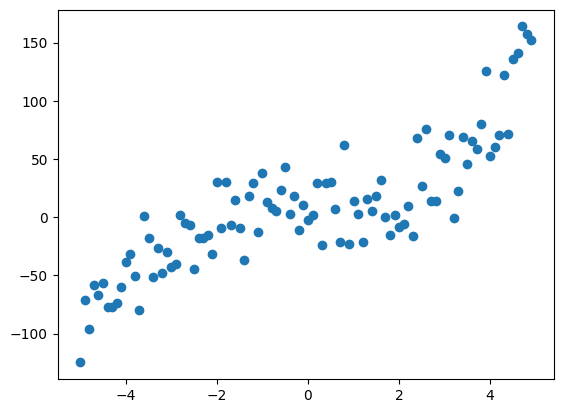

In [94]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

# Generate datapoints by adding normally distributed noise to cubic polynomial
x = np.arange(-5,5,0.1)
y_noise = 20 * np.random.normal(size = len(x))
y = 1*(x**3) + 1*(x**2) + 1*x + 3+y_noise
plt.scatter(x,y);


In [95]:
# Make polynomial data:
x1 = x                  # One dimensional arrays
x2 = np.power(x1,2)
x3 = np.power(x1,3)
n = len(x1)

# Reshaping data:
x1_new = np.reshape(x1,(n,1))  # Array of n rows and 1 column
x2_new = np.reshape(x2,(n,1))
x3_new = np.reshape(x3,(n,1))


In [96]:
# First column of matrix X:
x_bias = np.ones((n,1))

# Form the complete x matrix:
x_new = np.append(x_bias,x1_new,axis=1)
x_new = np.append(x_new,x2_new,axis=1)
x_new = np.append(x_new,x3_new,axis=1)

[3.33396908 0.10453336 0.87625261 1.0544538 ]


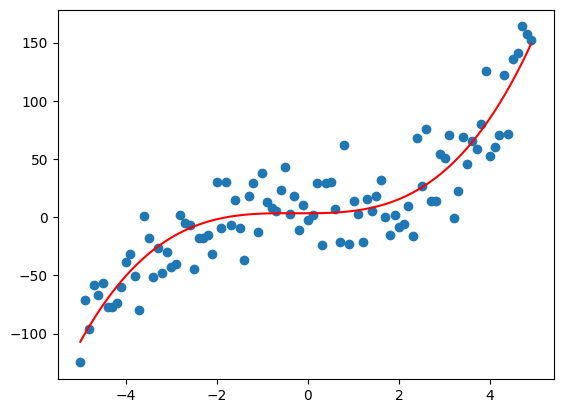

In [97]:
# Finding transpose
x_new_transpose = np.transpose(x_new)

# Finding dot product of original and transposed matrix
x_new_transpose_dot_x_new = x_new_transpose.dot(x_new)

# Finding Inverse
temp_1 = np.linalg.inv(x_new_transpose_dot_x_new)# Finding the dot product of transposed x and y :
temp_2 = x_new_transpose.dot(y)

# Finding coefficients
theta = temp_1.dot(temp_2)
print(theta)

# Store coefficient values in different variables:
beta_0 = theta[0]
beta_1 = theta[1]
beta_2 = theta[2]
beta_3 = theta[3]

# Plot the polynomial curve:
plt.scatter(x,y)
plt.plot(x,beta_0 + beta_1*x1 + beta_2*x2 + beta_3*x3,c="red")

In [99]:
# Prediction function:
def prediction(x1,x2,x3,beta_0,beta_1,beta_2,beta_3):
 y_pred = beta_0 + beta_1*x1 + beta_2*x2 + beta_3*x3
 return y_pred

# Making predictions:
pred = prediction(x1,x2,x3,beta_0,beta_1,beta_2,beta_3)

# Calculate accuracy of model:
def err(y_pred,y):
 var = (y - y_pred)
 var = var*var
 n = len(var)
 MSE = var.sum()
 MSE = MSE/n

 return MSE
# Calculating the error:
error = err(pred,y)
error


520.0946935541089

# Exponential Regression

In [100]:
# Import required libraries:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Dataset values :
day = np.arange(0,8)
weight = np.array([251,209,157,129,103,81,66,49])

# Exponential Function :
def expo_func(x, a, b):
 return a * b ** x

In [101]:

#popt :Optimal values for the parameters
#pcov :The estimated covariance of popt
popt, pcov = curve_fit(expo_func, day, weight)
weight_pred = expo_func(day,popt[0],popt[1])


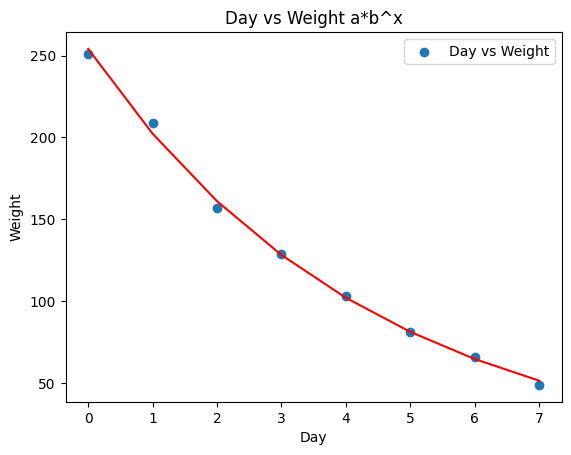

The equation of regression line is y=254.0486*0.7964^x


In [102]:

# Plotting the data
plt.plot(day, weight_pred, 'r-')
plt.scatter(day,weight,label='Day vs Weight')
plt.title("Day vs Weight a*b^x")
plt.xlabel('Day')
plt.ylabel('Weight')
plt.legend()
plt.show()

# Equation
a=popt[0].round(4)
b=popt[1].round(4)
print(f'The equation of regression line is y={a}*{b}^x')


# Sinusoidal Regression

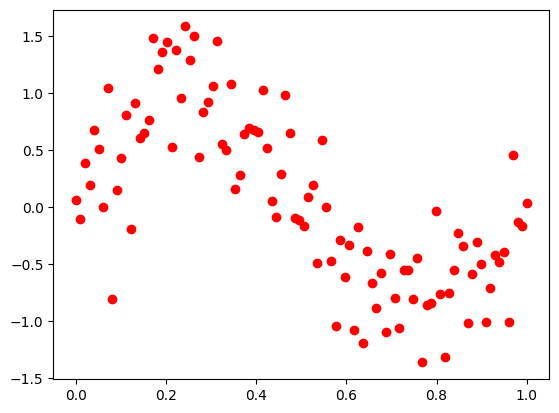

In [103]:
# Import required libraries:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Generating dataset:
# Y = A*sin(B(X + C)) + D
# A = Amplitude
# Period = 2*pi/B
# Period = Length of One Cycle
# C = Phase Shift (In Radian)
# D = Vertical Shift

X = np.linspace(0,1,100) #(Start,End,Points)

# Here…
# A = 1
# B= 2*pi
# B = 2*pi/Period
# Period = 1
# C = 0
# D = 0

Y = 1*np.sin(2*np.pi*X)

# Adding some Noise :
Noise = 0.4*np.random.normal(size=100)
Y_data = Y + Noise

plt.scatter(X,Y_data,c="r");


In [104]:

# Calculate the value:
def calc_sine(x,a,b,c,d):
 return a * np.sin(b* ( x + np.radians(c))) + d

# Finding optimal parameters :
popt,pcov = curve_fit(calc_sine,X,Y_data)


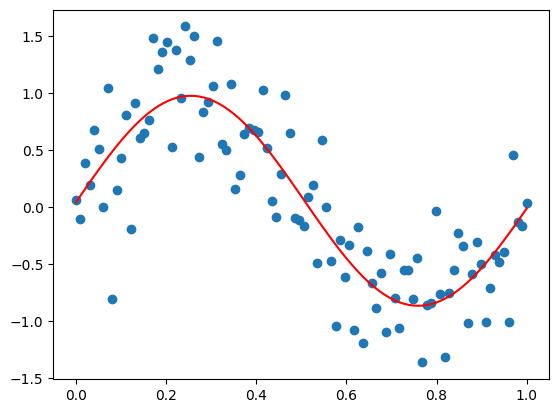

Accuracy = 0.7407568984961417


In [105]:

# Plot the main data :
plt.scatter(X,Y_data)# Plot the best fit curve :
plt.plot(X,calc_sine(X,*popt),c="r")
plt.show();

# Check the accuracy :
Accuracy =r2_score(Y_data,calc_sine(X,*popt))
print ('Accuracy =', Accuracy)


In [106]:

# Function to calculate the value :
def calc_line(X,m,b):
 return b + X*m

# It returns optimized parametes for our function :
# popt stores optimal parameters
# pcov stores the covarience between each parameters.
popt,pcov = curve_fit(calc_line,X,Y_data)


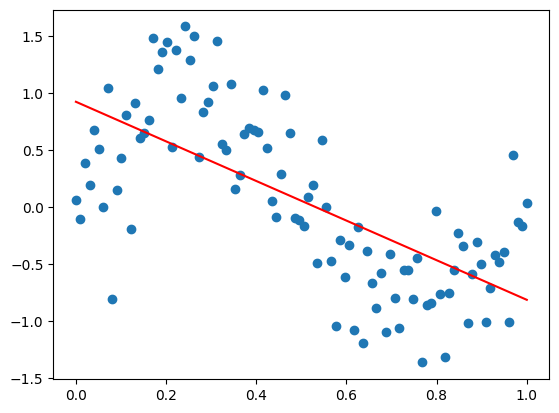

Accuracy of Linear Model :  0.4486766745231461


In [107]:

# Plot the main data :
plt.scatter(X,Y_data)

# Plot the best fit line :
plt.plot(X,calc_line(X,*popt),c="r")
plt.show()

# Check the accuracy of model :
Accuracy =r2_score(Y_data,calc_line(X,*popt))
print ("Accuracy of Linear Model : ",Accuracy)


# Logarithmic Regression

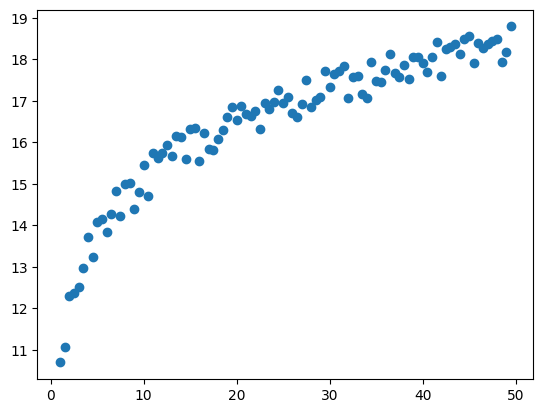

In [108]:
# Import required libraries:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Dataset:
# Y = a + b*ln(X)
X = np.arange(1,50,0.5)
Y = 10 + 2*np.log(X)

#Adding some noise to calculate error!
Y_noise = np.random.rand(len(Y))
Y = Y +Y_noise

plt.scatter(X,Y);

In [109]:
# 1st column of our X matrix should be 1:
n = len(X)
x_bias = np.ones((n,1))
print (X.shape)
print (x_bias.shape)

# Reshaping X :
X = np.reshape(X,(n,1))
print (X.shape)


(98,)
(98, 1)
(98, 1)


Accuracy = 0.9729370891242078


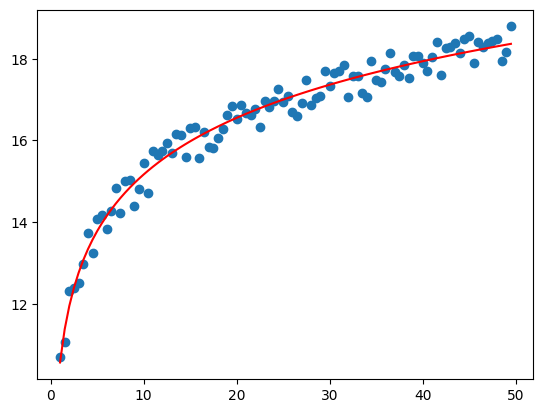

In [110]:

# Going with the formula:
# Y = a + b*ln(X)
X_log = np.log(X)

# Append the X_log to X_bias:
x_new = np.append(x_bias,X_log,axis=1)

# Transpose of a matrix:
x_new_transpose = np.transpose(x_new)

# Matrix multiplication:
x_new_transpose_dot_x_new = x_new_transpose.dot(x_new)

# Find inverse:
temp_1 = np.linalg.inv(x_new_transpose_dot_x_new)

# Matrix Multiplication:
temp_2 = x_new_transpose.dot(Y)

# Find the coefficient values:
theta = temp_1.dot(temp_2)

# Plot the data:
a = theta[0]
b = theta[1]
Y_plot = a + b*np.log(X)
plt.scatter(X,Y)
plt.plot(X,Y_plot,c="r")

# Check the accuracy:
Accuracy = r2_score(Y,Y_plot)
print ('Accuracy =', Accuracy)
